**Student Performance Predictor**
--

**Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

**1. Problem statement**
--

This project examines how certain factors influence student performance.

**2. Data Collection**
--

- Data Source -  https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

- The data consists of 10000 rows and 6 columns

**2.1 Import Data and Required Packages** 
--

**Importing Pandas, Numpy, Matplotlib, Kaggle, Scikit-learn and Scipy Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import kaggle 

**Import the DataSet**

In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('nikhil7280/student-performance-multiple-linear-regression', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression


**File information**

In [3]:
print(kaggle.api.dataset_list_files('nikhil7280/student-performance-multiple-linear-regression').files)

[{"ref": "", "datasetRef": "", "ownerRef": "", "name": "Student_Performance.csv", "creationDate": "2023-06-29T10:38:17.326Z", "description": "", "fileType": "", "url": "", "totalBytes": 175071, "columns": []}]


**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv("data/Student_Performance.csv")

**Show Top 5 Records**

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Shape of the dataset**

In [6]:
df.shape

(10000, 6)

**2.2 Dataset information**
--

- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

**3. Data Checks to perform**
--

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

**3.1 Check Missing values**
--

In [7]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**There are no missing values in the data set**

**3.2 Check Duplicates**
--

In [8]:
df.duplicated().sum()

np.int64(127)

**There are 127 duplicates values in the data set**

**Remove duplicates**

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

**3.3 Check data types**
--

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


**3.4 Checking the number of unique values of each column**
--

In [11]:
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

**3.5 Check statistics of data set**
--

In [12]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**Insight**
- Performance Index is between 10 and 100
- There is no negative values in data set

**3.7 Exploring Data**
--

In [13]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [14]:
print("Categories in 'Extracurricular Activities' variable:",end=" " )
print(df['Extracurricular Activities'].unique())

Categories in 'Extracurricular Activities' variable: ['Yes' 'No']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

We have 1 categorical features : ['Extracurricular Activities']


In [16]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


**3.8 Adding columns for "Rest to Study Ratio" and "Effort on Top of Knowledge"**
--

In [17]:
df['Rest to Study Ratio'] = df['Sleep Hours'] / df['Hours Studied']
df['Effort on Top of Knowledge'] = df['Previous Scores'] * df['Hours Studied']
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Rest to Study Ratio,Effort on Top of Knowledge
0,7,99,Yes,9,1,91.0,1.285714,693
1,4,82,No,4,2,65.0,1.000000,328
2,8,51,Yes,7,2,45.0,0.875000,408
3,5,52,Yes,5,2,36.0,1.000000,260
4,7,75,No,8,5,66.0,1.142857,525


In [18]:
PerformanceMin_full = (df['Performance Index'] == 10.0).sum()
PerformanceMax_full = (df['Performance Index'] == 100.0).sum()
HoursStudiedMax_full = (df['Hours Studied'] == 9.0).sum()
HoursStudiedMin_full = (df['Hours Studied'] == 1.0).sum()

print(f'Number of students with minimum Performance Index: {PerformanceMin_full}')
print(f'Number of students with maximum Performance Index: {PerformanceMax_full}')
print(f'Number of students with minimum Hours Studied: {HoursStudiedMin_full}')
print(f'Number of students with maximum Hours Studied: {HoursStudiedMax_full}')

Number of students with minimum Performance Index: 1
Number of students with maximum Performance Index: 3
Number of students with minimum Hours Studied: 1133
Number of students with maximum Hours Studied: 1099


In [19]:
Performance_less_60 = (df['Performance Index'] <= 60.0).sum()

print(f'Number of students with performance index less than 60.0: {Performance_less_60}')
print(f'Number of students with performance index more than 60.0: {df['Performance Index'].count()-Performance_less_60}')

Number of students with performance index less than 60.0: 5804
Number of students with performance index more than 60.0: 4069


**Insights**
- From above values we get the greatest number of students with performance index more than 60.0
- The minimum and maximum performance have a few students

**4. Exploring Data ( Visualization )**
--

**4.1 Distributions of key learning activity variables**
--

- Histogram
- Kernel Distribution Function (KDE)

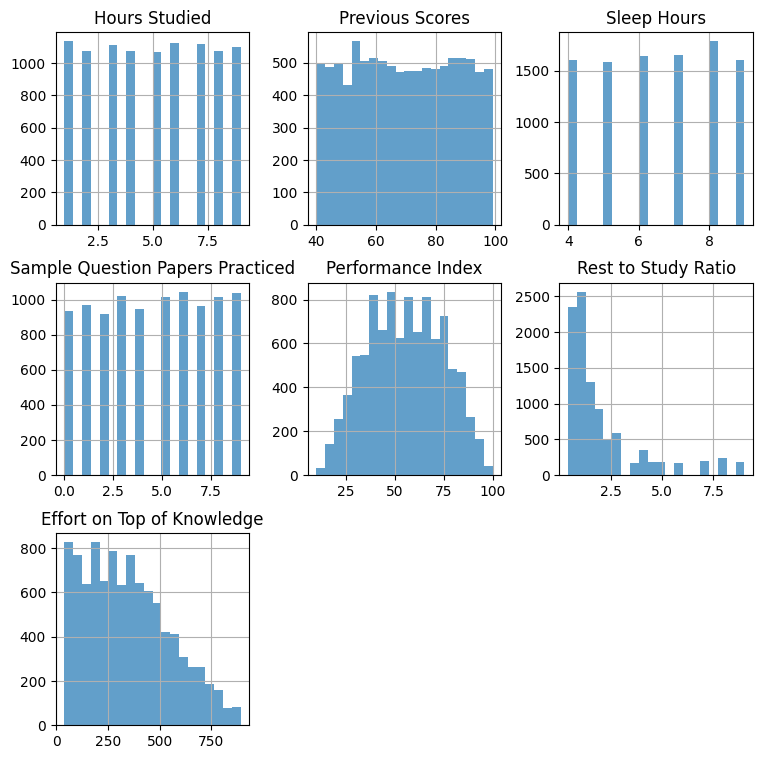

In [20]:
df.hist(alpha=0.7, bins=20, 
layout=(3, 3), figsize=(9, 9))
plt.show()

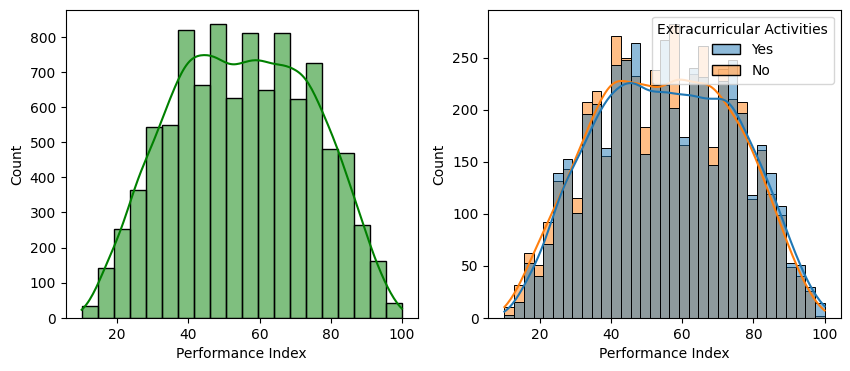

In [21]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='Performance Index',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Performance Index',kde=True,hue='Extracurricular Activities')
plt.show()

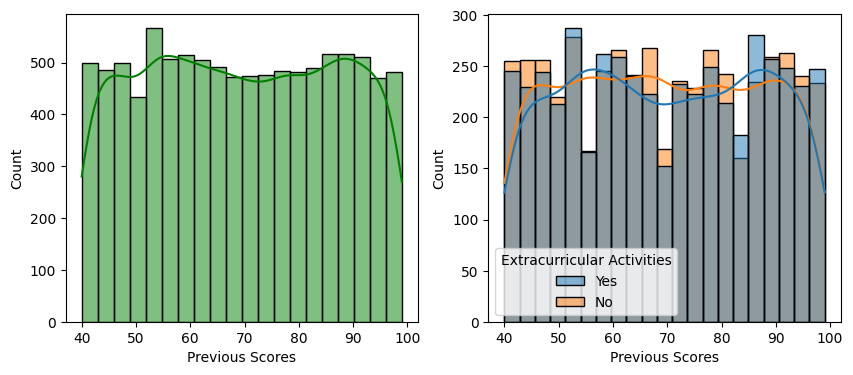

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='Previous Scores',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Previous Scores',kde=True,hue='Extracurricular Activities')
plt.show()

**Insights:**
- Students who participate in extracurricular activities ("Yes") tend to perform better on both the current achievement index and previous scores, although the correlation is stronger for the achievement index.

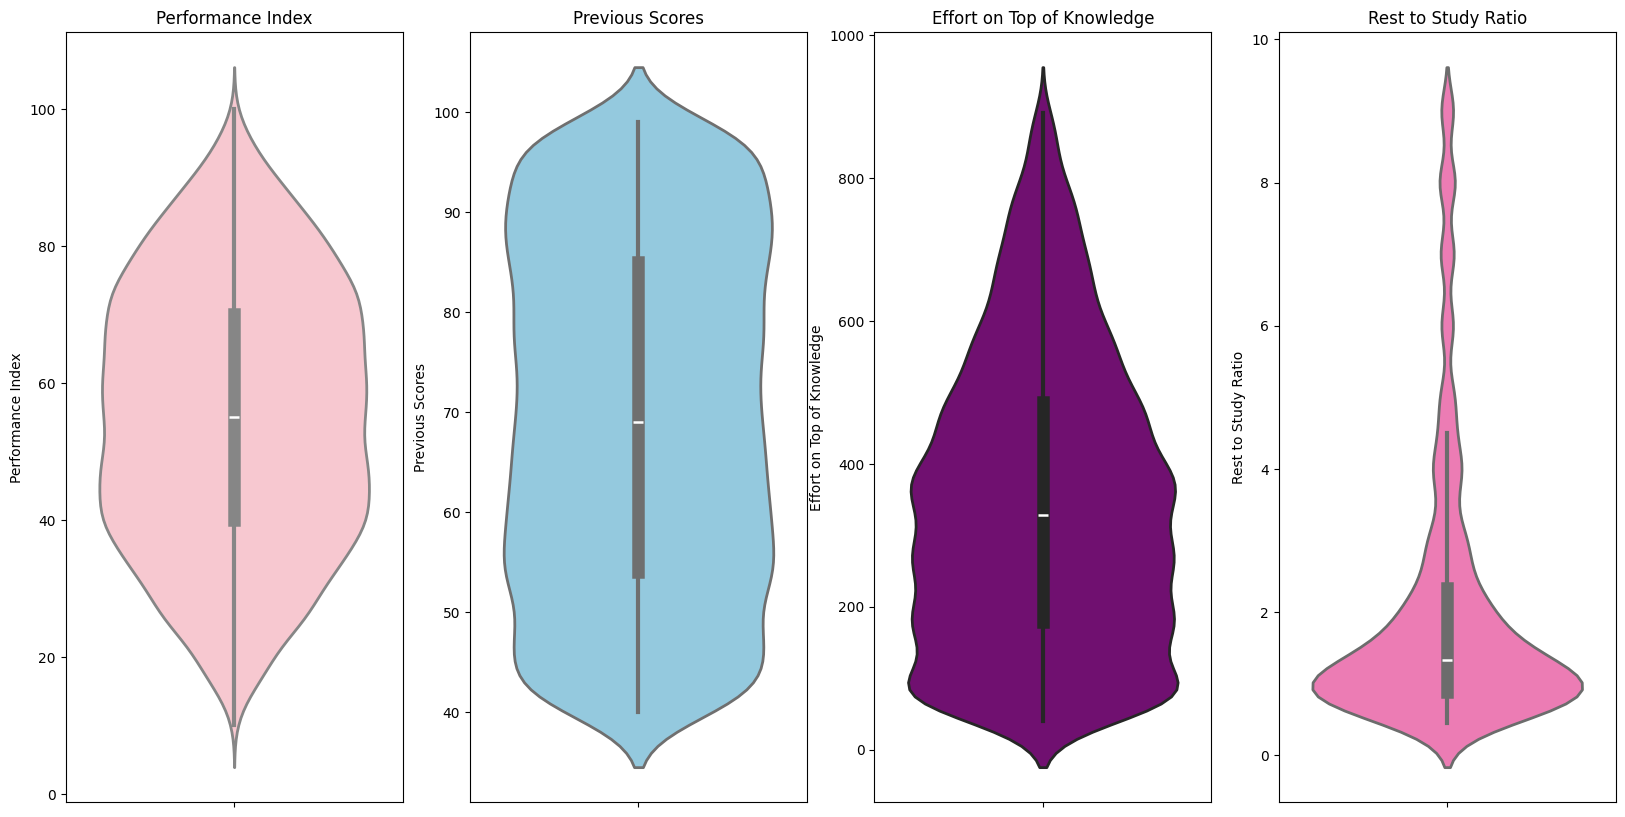

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.title('Performance Index')
sns.violinplot(y='Performance Index',data=df,color='pink',linewidth=2)
plt.subplot(1, 4, 2)
plt.title('Previous Scores')
sns.violinplot(y='Previous Scores',data=df,color='skyblue',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('Effort on Top of Knowledge')
sns.violinplot(y='Effort on Top of Knowledge',data=df,color='purple',linewidth=2)
plt.subplot(1, 4, 4)
plt.title('Rest to Study Ratio')
sns.violinplot(y='Rest to Study Ratio',data=df,color='hotpink',linewidth=2)
plt.show()

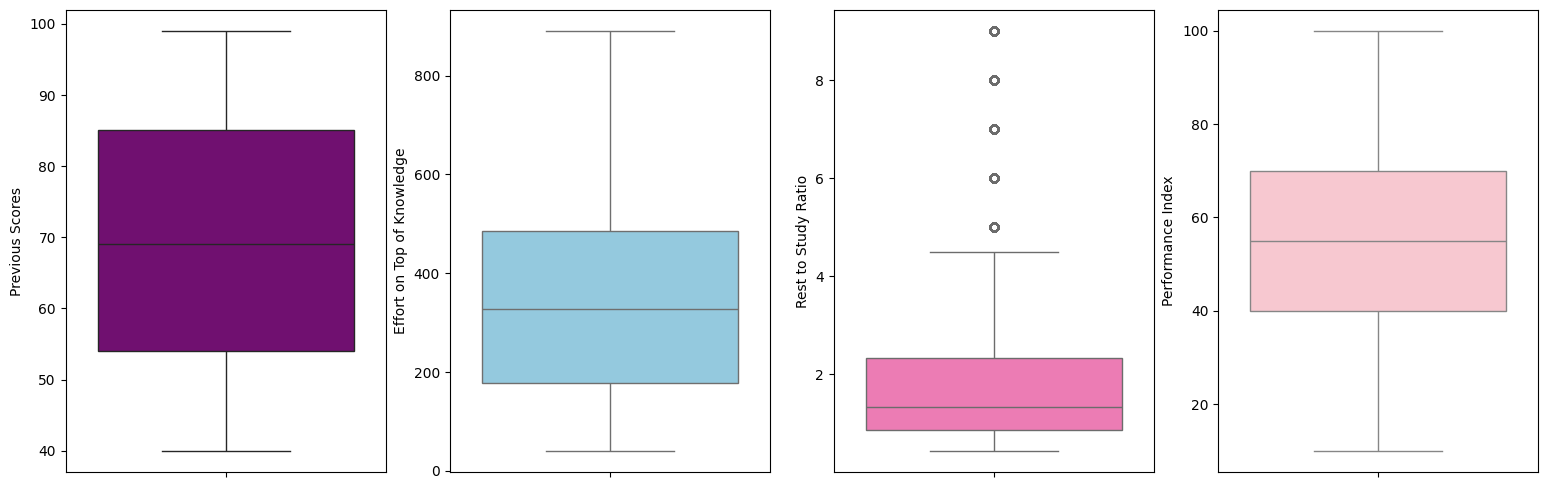

In [24]:
plt.subplots(1,4,figsize=(19,6))
plt.subplot(141)
sns.boxplot(df['Previous Scores'],color='purple')
plt.subplot(142)
sns.boxplot(df['Effort on Top of Knowledge'],color='skyblue')
plt.subplot(143)
sns.boxplot(df['Rest to Study Ratio'],color='hotpink')
plt.subplot(144)
sns.boxplot(df['Performance Index'],color='pink')
plt.show()

**Insights:**
- The Effort to Knowledge and Rest to Study Ratio variables have a skewed distribution, with significant differences in effort and rest time across students. This suggests that students approach these variables differently, with some making exceptional efforts or taking longer breaks.
- The Performance Index and Previous Grades are more concentrated around the mean, suggesting that most students perform similarly and have average previous grades.

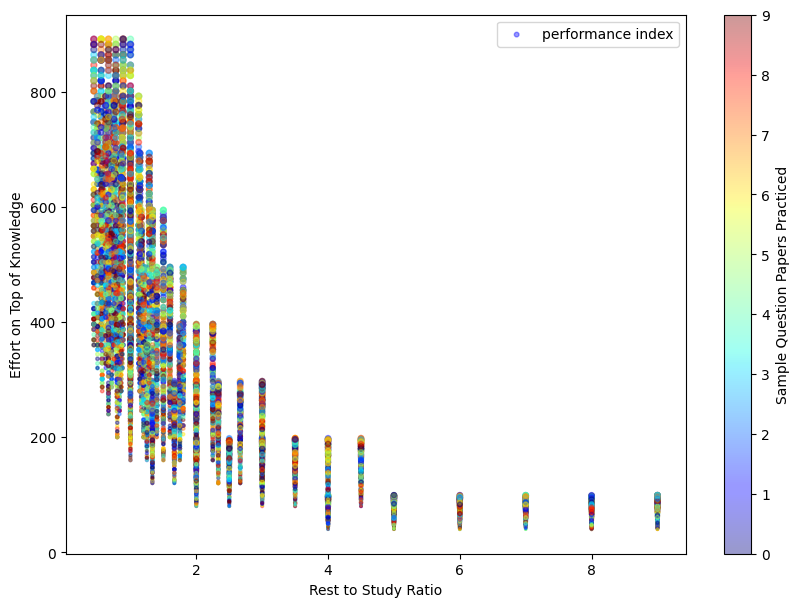

In [25]:
df.plot(kind="scatter", x="Rest to Study Ratio", y="Effort on Top of Knowledge", alpha=0.4,
        s=df["Performance Index"]/5, label="performance index", figsize=(10,7),
        c="Sample Question Papers Practiced", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

**Insights:**
- Effort spent on learning is inversely related to the ratio of rest to study: more rest equals less effort. Students who balance study and rest time are able to achieve better results. Students who put in consistent effort combined with rest tend to study more, which likely improves performance.

**4.2 Coorelation matrix and dependencies**
--

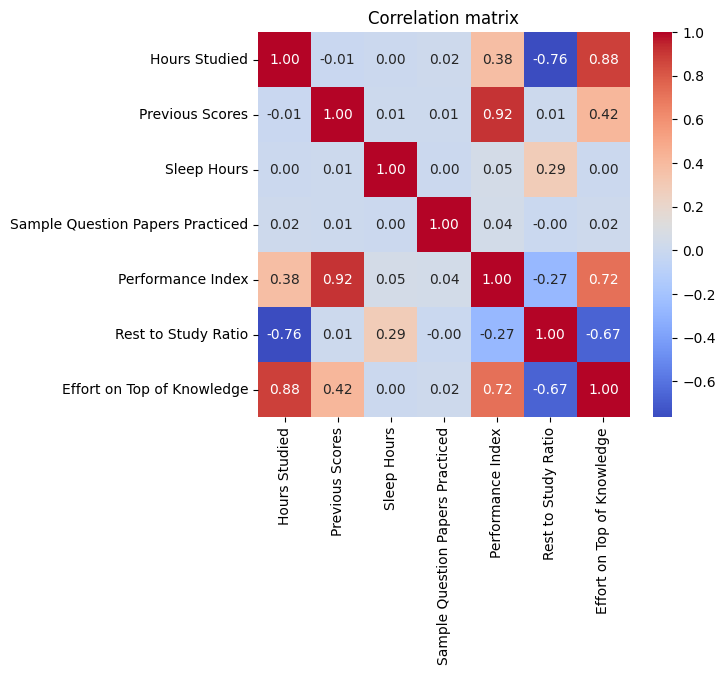

In [26]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

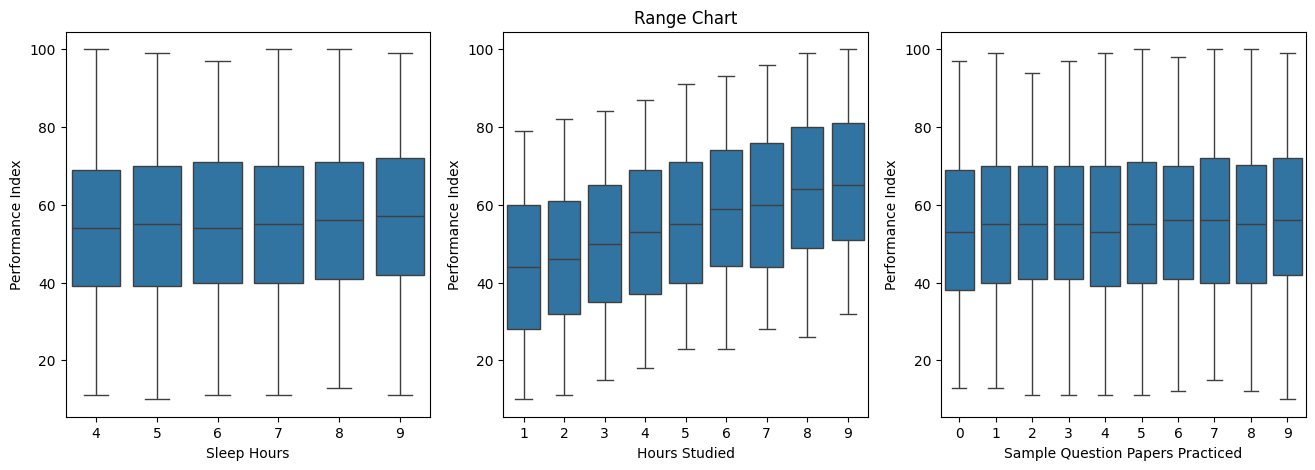

In [27]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(x='Sleep Hours', y='Performance Index', data=df)
plt.subplot(132)
plt.title('Range Chart')
sns.boxplot(x='Hours Studied', y='Performance Index', data=df)
plt.subplot(133)
sns.boxplot(x='Sample Question Papers Practiced', y='Performance Index', data=df)
plt.show()

**Insights:**
- Study hours and effort have an important impact on the performance index.
- Previous grades have a very strong relationship with the performance index.
- Hours of sleep and practice of sample questions do not have a strong impact on the results.
- Students with a high performance index usually devote more time to studying than to leisure.

**4.3 Extracurricular Activities**
--

How many students participate in Extracurricular Activities?
What is the effect of Extracurricular Activities on other values?

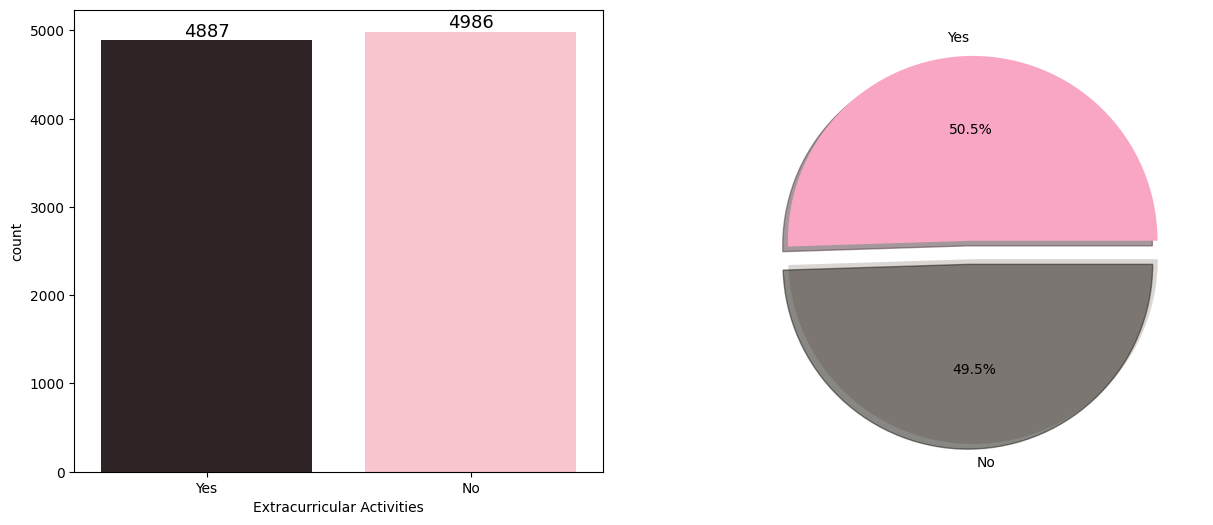

In [28]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['Extracurricular Activities'],hue=df['Extracurricular Activities'],data=df,palette='dark:pink',ax=ax[0],saturation=0.8, legend=False)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=13)
    
plt.pie(x=df['Extracurricular Activities'].value_counts(),labels=['Yes','No'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=["#F9A6C5","#46342533"])
plt.show()

**Insights:**
- The number of students who participate in extracurricular activities and those who do not participate is almost the same.

In [29]:
activity_group = df.groupby('Extracurricular Activities').mean()
activity_group

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Rest to Study Ratio,Effort on Top of Knowledge
Extracurricular Activities,,,,,,,
No,4.979543,69.277577,6.572002,4.543722,54.720818,2.104418,344.075411
Yes,5.004911,69.607939,6.490485,4.623082,55.722529,2.039090,348.323307


**Insights:**
- Extracurricular activities do not have a significant impact on other values.

**4.4 Conclusions**
--
- Student's Performance is related with Study hours, effort, rest to study ratio and Previous grades
- Hours of sleep, practice of sample questions and extracurricular activities do not have a strong impact on the results.